## Import Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import norm,t
import statistics
import seaborn as sns
import scipy as stats
from scipy import stats

## Data

In [24]:
data=pd.read_csv("D:\Dataset/SOCR-HeightWeight.csv")

In [25]:
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [26]:
col = data['Height(Inches)']
col

0        65.78331
1        71.51521
2        69.39874
3        68.21660
4        67.78781
           ...   
24995    69.50215
24996    64.54826
24997    64.69855
24998    67.52918
24999    68.87761
Name: Height(Inches), Length: 25000, dtype: float64

In [27]:
col2 = data['Weight(Pounds)']
col2

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight(Pounds), Length: 25000, dtype: float64

## Find Mean and standard deviation

In [28]:
mean=np.mean(data)
mean

Index             12500.500000
Height(Inches)       67.993114
Weight(Pounds)      127.079421
dtype: float64

In [29]:
mean_height=np.mean(col)
mean_height

67.99311359679979

In [30]:
mean_weight=np.mean(col2)
mean_weight

127.07942116079916

In [31]:
std_dev=np.std(data)
std_dev

Index             7216.878359
Height(Inches)       1.901641
Weight(Pounds)      11.660664
dtype: float64

In [32]:
std_dev_height=np.std(col)
std_dev_height

1.9016407372498367

In [33]:
std_dev_weight=np.std(col2)
std_dev_weight

11.66066434332079

## Draw sample of size n

In [34]:
np.random.seed(20)
samplesize=40
sample=np.random.choice(col,samplesize)
sample

array([71.24277, 68.28614, 65.50539, 64.9936 , 64.81203, 68.22623,
       70.97046, 69.3919 , 67.83682, 68.88989, 68.57752, 68.42829,
       68.48055, 67.54731, 64.32105, 69.39665, 70.30407, 68.57866,
       66.84021, 69.49877, 70.78508, 67.83781, 64.9089 , 71.46877,
       65.17573, 71.66221, 71.76731, 66.94959, 70.73008, 66.40623,
       67.51094, 67.9508 , 69.22852, 68.60162, 66.67426, 67.59082,
       68.22623, 67.10869, 69.52012, 68.84648])

In [35]:
sample_mean=np.mean(sample)
sample_mean

68.2769625

In [36]:
sample_std_dev=np.std(sample)
sample_std_dev

1.9635192844860854

## Confidence interval when standard deviation is known

In [37]:
# confidence interval
confidence_level=0.99

# sample size is length of the data
sample_size=len(data)

# z-score to calculate confidence interval
z_score=norm.ppf((1+confidence_level)/2)

# margin of error
margin_of_error=z_score*((std_dev)/np.sqrt(sample_size))
lower_bound=mean-margin_of_error 
upper_bound=mean+margin_of_error

print("Confidence Interval of height:",(lower_bound, upper_bound))

Confidence Interval of height: (Index             12382.930016
Height(Inches)       67.962134
Weight(Pounds)      126.889458
dtype: float64, Index             12618.069984
Height(Inches)       68.024093
Weight(Pounds)      127.269385
dtype: float64)


## Confidence interval when standard deviation is unknown

In [40]:
# sample size is length of the data
sample_size= len(data)

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Confidence interval 
confidence_level = 0.95

# T-score for the confidence level and degrees of freedom
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Margin of error
margin_of_error = t_score * (sample_std_dev / np.sqrt(sample_size))

# Confidence interval bounds
ci_lower_2= mean - margin_of_error
ci_upper_2= mean + margin_of_error

print("Confidence interval when standard deviation is unknown:")
print("Lower bound:", ci_lower_2)
print("Upper bound:", ci_upper_2)


Confidence interval when standard deviation is unknown:
Lower bound: Index             12500.475659
Height(Inches)       67.968773
Weight(Pounds)      127.055080
dtype: float64
Upper bound: Index             12500.524341
Height(Inches)       68.017454
Weight(Pounds)      127.103762
dtype: float64


## Boxplot

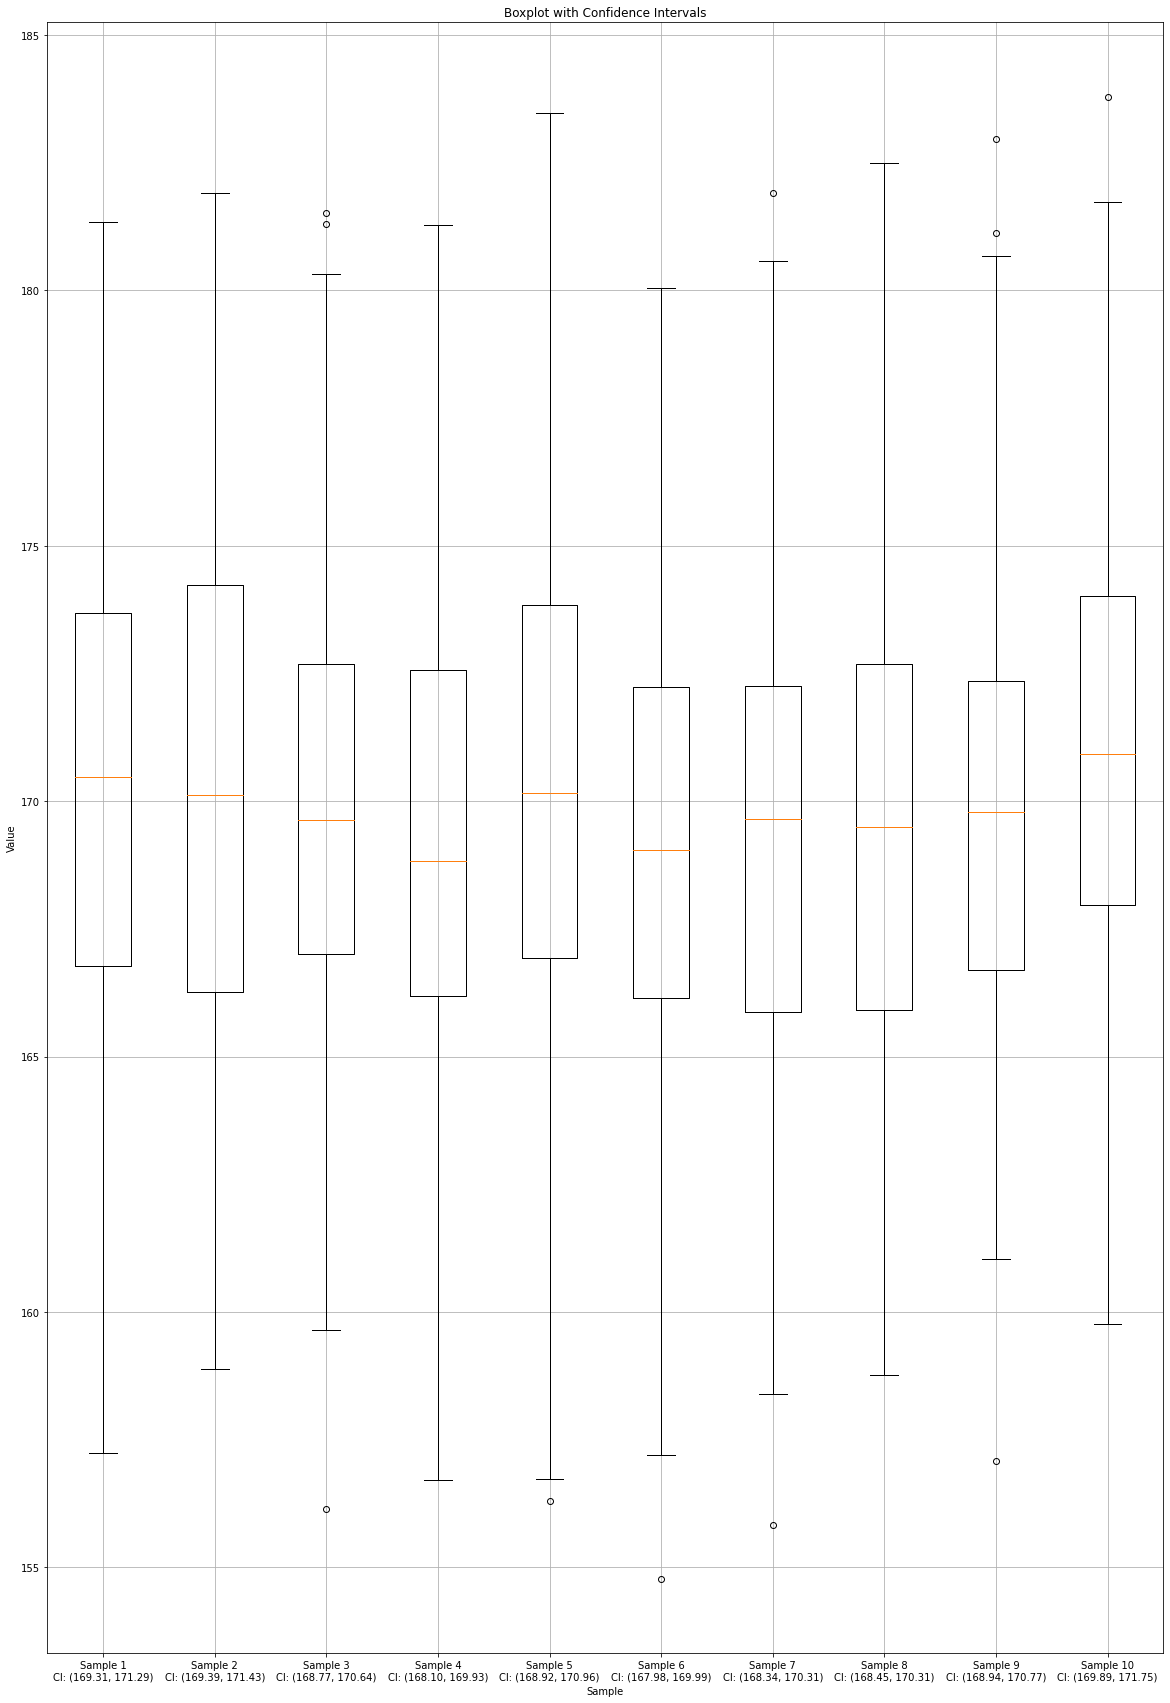

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
no_of_samples = 10
sample_size = 100
data = np.random.normal(loc=170, scale=5, size=(no_of_samples, sample_size))

# Calculate standard deviations for each sample
std_deviations = np.std(data, axis=1)

# Calculate confidence interval for each sample
CI = [stats.norm.interval(0.95, loc=np.mean(data[i]), scale=stats.sem(data[i])) for i in range(len(data))]

# Create a boxplot for all samples
plt.figure(figsize=(20, 30))
plt.boxplot(data.T, labels=[f"Sample {i+1}\nCI: ({CI[i][0]:.2f}, {CI[i][1]:.2f})" for i in range(len(data))])
plt.title("Boxplot with Confidence Intervals")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()
